In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
df=pd.read_csv('tmdb_5000_credits.csv')
df1=pd.read_csv('tmdb_5000_movies.csv')
df2=pd.read_csv('ratings.csv')
df3=pd.read_csv('links.csv')

In [4]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
df1=df1[['title','id','genres','keywords','overview','popularity'] ]
df1['cast']=df['cast']
df1['crew']=df['crew']
df1.genres
df1.dropna(inplace=True)

In [6]:
import ast
def makelist(strx):
    li=[]
    for i in ast.literal_eval(strx):
        li.append(i['name'])
    return li

In [7]:
def makelist2(strx):
    li=[]
    for i in ast.literal_eval(strx):
        if(i['job']=="Director"):
            li.append(i['name'])
    return li

In [8]:
df1.crew[1]
df1.genres=df1.genres.apply(makelist)
df1.keywords=df1.keywords.apply(makelist)
df1.cast=df1.cast.apply(makelist)
df1.crew=df1.crew.apply(makelist2)


In [9]:
df1 = df1.rename(columns={'crew': 'director'})
df1['cast']=df1['cast'].apply(lambda x: x[:4])


In [10]:
df1

,title,id,genres,keywords,overview,popularity,cast,director
0,Avatar,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,Spectre,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,John Carter,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
...,...,...,...,...,...,...,...,...
4798,El Mariachi,9367,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",El Mariachi just wants to play his guitar and ...,14.269792,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4799,Newlyweds,72766,"[Comedy, Romance]",[],A newlywed couple's honeymoon is upended by th...,0.642552,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",[Edward Burns]
4800,"Signed, Sealed, Delivered",231617,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith]
4801,Shanghai Calling,126186,[],[],When ambitious New York attorney Sam is sent t...,0.857008,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Daniel Hsia]


In [11]:
#in our tags columns, we need to remove spaces between two words which represent one entity so that our reccomender thinks it is same
dfn=df1.copy()
df1.genres=df1.genres.apply(lambda x:[ i.replace(" ","") for i in x])
df1.cast=df1.cast.apply(lambda x:[ i.replace(" ","") for i in x])
df1.director=df1.director.apply(lambda x:[ i.replace(" ","") for i in x])
df1.keywords=df1.keywords.apply(lambda x:[ i.replace(" ","") for i in x])

In [12]:
df1.overview=df1.overview.apply(lambda x:x.split())
df1.cast

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4798    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4799    [EdwardBurns, KerryBishé, MarshaDietlein, Cait...
4800    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4801     [DanielHenney, ElizaCoupe, BillPaxton, AlanRuck]
4802    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Name: cast, Length: 4800, dtype: object

In [13]:
df1['tags']=df1['cast']+df1['director']+df1['keywords']+df1['genres']+df1['overview']
df1.drop(columns=['cast','genres','director','keywords','overview'],inplace=True)

In [14]:
df1['title'][200]

'The Hunger Games: Mockingjay - Part 1'

In [15]:
#now we will use countvectorizer, as it finds the most common words of all tags we will truncate the words to their root forms to avoid repetion
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
#df1.tags=df1.tags.apply(ps)
def porter(strx):
    y=[]
    for i in strx:
        y.append(ps.stem(i))
    return y


In [16]:
df1.tags=df1.tags.apply(porter)
df1.tags[0]

['samworthington',
 'zoesaldana',
 'sigourneyweav',
 'stephenlang',
 'jamescameron',
 'cultureclash',
 'futur',
 'spacewar',
 'spacecoloni',
 'societi',
 'spacetravel',
 'futurist',
 'romanc',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marin',
 'soldier',
 'battl',
 'loveaffair',
 'antiwar',
 'powerrel',
 'mindandsoul',
 '3d',
 'action',
 'adventur',
 'fantasi',
 'sciencefict',
 'in',
 'the',
 '22nd',
 'century,',
 'a',
 'parapleg',
 'marin',
 'is',
 'dispatch',
 'to',
 'the',
 'moon',
 'pandora',
 'on',
 'a',
 'uniqu',
 'mission,',
 'but',
 'becom',
 'torn',
 'between',
 'follow',
 'order',
 'and',
 'protect',
 'an',
 'alien',
 'civilization.']

In [17]:
#list to string conversion
df1['tags']=df1['tags'].apply(lambda x: ' '.join(x))
df1['tags']

0       samworthington zoesaldana sigourneyweav stephe...
1       johnnydepp orlandobloom keiraknightley stellan...
2       danielcraig christophwaltz léaseydoux ralphfie...
3       christianbal michaelcain garyoldman annehathaw...
4       taylorkitsch lynncollin samanthamorton willemd...
                              ...                        
4798    carlosgallardo jaimedehoyo petermarquardt rein...
4799    edwardburn kerrybishé marshadietlein caitlinfi...
4800    ericmabiu kristinbooth crystallow geoffgustafs...
4801    danielhenney elizacoup billpaxton alanruck dan...
4802    drewbarrymor brianherzling coreyfeldman ericro...
Name: tags, Length: 4800, dtype: object

In [18]:
#stop words are joining words in language like and,is
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6000,stop_words='english')
vectors=cv.fit_transform(df1['tags']).toarray()

In [19]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [20]:
#now lets suggest movies based on the cosine distance of these vectors
from sklearn.metrics.pairwise import cosine_similarity
similar=cosine_similarity(vectors)

In [21]:
df_fr_content=df1
df_fr_content

,title,id,popularity,tags
0,Avatar,19995,150.437577,samworthington zoesaldana sigourneyweav stephe...
1,Pirates of the Caribbean: At World's End,285,139.082615,johnnydepp orlandobloom keiraknightley stellan...
2,Spectre,206647,107.376788,danielcraig christophwaltz léaseydoux ralphfie...
3,The Dark Knight Rises,49026,112.312950,christianbal michaelcain garyoldman annehathaw...
4,John Carter,49529,43.926995,taylorkitsch lynncollin samanthamorton willemd...
...,...,...,...,...
4798,El Mariachi,9367,14.269792,carlosgallardo jaimedehoyo petermarquardt rein...
4799,Newlyweds,72766,0.642552,edwardburn kerrybishé marshadietlein caitlinfi...
4800,"Signed, Sealed, Delivered",231617,1.444476,ericmabiu kristinbooth crystallow geoffgustafs...
4801,Shanghai Calling,126186,0.857008,danielhenney elizacoup billpaxton alanruck dan...


In [22]:
def recommend(movie):
    idx=df_fr_content[df_fr_content["title"]==movie].index[0]
    frthatmovie=similar[idx]
    movielist=sorted(list(enumerate(frthatmovie)),reverse=True,key=lambda x:x[1])[1:6]
    for i in movielist:
        x,y=i
        tmbid=i[0]
        print(df_fr_content['title'][x])
    

In [23]:
recommend('Batman')

Batman & Robin
Batman Begins
Osama
Batman Returns
The Dark Knight Rises


In [27]:
df2 = df2.merge(df3, on='movieId', how='left')
df2.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId_x', 'tmdbId_x',
       'imdbId_y', 'tmdbId_y'],
      dtype='object')

In [28]:
df2.groupby(['movieId']).count()

,userId,rating,timestamp,imdbId_x,tmdbId_x,imdbId_y,tmdbId_y
movieId,,,,,,,
1,215,215,215,215,215,215,215
2,110,110,110,110,110,110,110
3,52,52,52,52,52,52,52
4,7,7,7,7,7,7,7
5,49,49,49,49,49,49,49
...,...,...,...,...,...,...,...
193581,1,1,1,1,1,1,1
193583,1,1,1,1,1,1,1
193585,1,1,1,1,1,1,1


In [29]:
df2.drop(columns=['timestamp','imdbId_x','imdbId_y','tmdbId_y'],inplace=True)
df2=df2.dropna()
df2.columns

Index(['userId', 'movieId', 'rating', 'tmdbId_x'], dtype='object')

In [30]:
df1 = pd.merge(df1, df2, left_on='id', right_on='tmdbId_x', how='inner')
df1.drop(columns=['tmdbId_x','movieId','popularity'],inplace=True)
df1.groupby(['id']).count()

,title,tags,userId,rating
id,,,,
5,20,20,20,20
11,251,251,251,251
12,141,141,141,141
13,329,329,329,329
14,204,204,204,204
...,...,...,...,...
342521,2,2,2,2
345911,2,2,2,2
347969,2,2,2,2


In [31]:
df1=df1.sort_values('userId',ascending=True)
df1=df1.reset_index(drop=True)
df1.groupby(['id']).count()
#135,1879,2018,2966,355

,title,tags,userId,rating
id,,,,
5,20,20,20,20
11,251,251,251,251
12,141,141,141,141
13,329,329,329,329
14,204,204,204,204
...,...,...,...,...
342521,2,2,2,2
345911,2,2,2,2
347969,2,2,2,2


In [32]:
users=df1['userId'].unique()
df1

,title,id,tags,userId,rating
0,Dr. No,646,seanconneri ursulaandress josephwiseman jacklo...,1,5.0
1,Groundhog Day,137,billmurray andiemacdowel chriselliott stephent...,1,4.0
2,Se7en,807,bradpitt morganfreeman gwynethpaltrow johnc.mc...,1,5.0
3,Bottle Rocket,13685,lukewilson owenwilson lumicavazo andrewwilson ...,1,5.0
4,Clear and Present Danger,9331,harrisonford willemdafo annearch joaquimdealme...,1,4.0
...,...,...,...,...,...
70189,Meet the Fockers,693,benstil teripolo robertdeniro dustinhoffman ja...,610,3.0
70190,300,1271,gerardbutl lenaheadey dominicwest davidwenham ...,610,4.0
70191,The Ladykillers,5516,tomhank irmap.hal marlonwayan j.k.simmon joelc...,610,3.5
70192,May,10894,angelabetti jeremysisto annafari jamesduv luck...,610,4.0


In [33]:
user_matrix=df1.pivot_table(index='userId',columns='id',values='rating')
user_matrix=user_matrix.apply(lambda x: x.fillna(0),axis=0)
user_matrix=user_matrix.to_numpy()
user_matrix

array([[0. , 5. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 3.5, 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 5. , 4. , ..., 0. , 0. , 0. ]])

c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

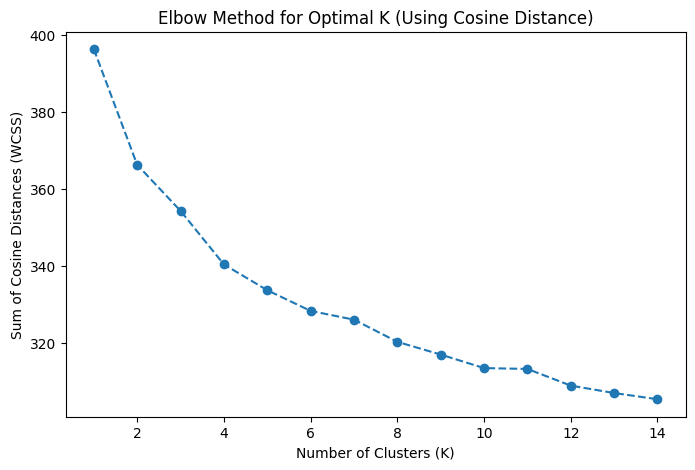

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_distances

# Simulate 600 random vectors (e.g., 300-dimensional TF-IDF vectors)
X = user_matrix

# Normalize data (L2 normalization ensures cosine similarity works)
X_normalized = normalize(X, norm='l2')

# Try different K values
wcss = []  # Store WCSS (sum of cosine distances)
K_range = range(1, 15)  # Checking K from 1 to 14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    
    # Compute WCSS using cosine distance
    clusters = kmeans.cluster_centers_
    distances = cosine_distances(X_normalized, clusters)  # Pairwise cosine distance
    wcss.append(np.sum(np.min(distances, axis=1)))  # Sum of min distances to centroids

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Cosine Distances (WCSS)")
plt.title("Elbow Method for Optimal K (Using Cosine Distance)")
plt.show()


as this is inconclusive we will use Silhouette method


c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

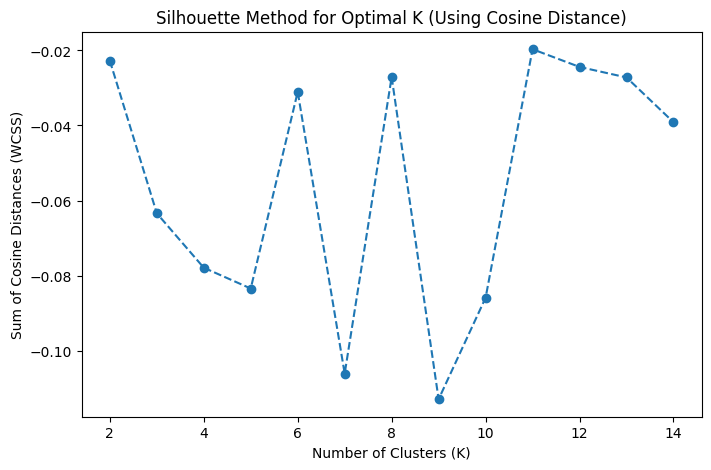

In [35]:
from sklearn.metrics import silhouette_score

sil = []
K_range = range(2, 15)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K_range:
  kmeans = KMeans(n_clusters = k).fit(user_matrix)
  labels = kmeans.labels_
  sil.append(silhouette_score(user_matrix, labels, metric = 'cosine'))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Cosine Distances (WCSS)")
plt.title("Silhouette Method for Optimal K (Using Cosine Distance)")
plt.show()

optimum k=6


In [36]:
user_matrix

array([[0. , 5. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 3.5, 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 5. , 4. , ..., 0. , 0. , 0. ]])

In [37]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

trainset is surprise object lets convert it to numpy array


In [38]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(user_matrix)

c:\Users\ninad\anaconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [39]:
def user_recommend(index):
    user_cluster = kmeans.predict(user_matrix[index].reshape(1, -1))[0]
    cluster_users = np.where(kmeans.labels_ == user_cluster)[0]
    cluster_ratings = user_matrix[cluster_users]
    predicted_ratings = cluster_ratings.mean(axis=0)
    unrated_items = np.where(user_matrix[index] == 0)[0]
    recommended_items = unrated_items[np.argsort(predicted_ratings[unrated_items])[::-1]][0:5]
    for x in recommended_items:
        print(df1['title'][x])


In [40]:
user_recommend(23)

Swingers
Groundhog Day
Desperado
Wayne's World
The Mask


In [41]:
import pickle
#pickle.dump(new_df,open('movies1.pkl','wb'))
pickle.dump(df1,open('df1.pkl','wb'))
pickle.dump(df_fr_content,open('df_fr_content.pkl','wb'))
pickle.dump(similar,open('similar.pkl','wb'))
pickle.dump(user_matrix,open('s.pkl','wb'))
pickle.dump(users,open('users.pkl','wb'))

In [42]:
df_fr_content

,title,id,popularity,tags
0,Avatar,19995,150.437577,samworthington zoesaldana sigourneyweav stephe...
1,Pirates of the Caribbean: At World's End,285,139.082615,johnnydepp orlandobloom keiraknightley stellan...
2,Spectre,206647,107.376788,danielcraig christophwaltz léaseydoux ralphfie...
3,The Dark Knight Rises,49026,112.312950,christianbal michaelcain garyoldman annehathaw...
4,John Carter,49529,43.926995,taylorkitsch lynncollin samanthamorton willemd...
...,...,...,...,...
4798,El Mariachi,9367,14.269792,carlosgallardo jaimedehoyo petermarquardt rein...
4799,Newlyweds,72766,0.642552,edwardburn kerrybishé marshadietlein caitlinfi...
4800,"Signed, Sealed, Delivered",231617,1.444476,ericmabiu kristinbooth crystallow geoffgustafs...
4801,Shanghai Calling,126186,0.857008,danielhenney elizacoup billpaxton alanruck dan...


In [49]:
len(df1['userId'].unique())


610